In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
listaPaths = [r"C:\Users\micha\Desktop\IC\NAO_IDENT_null_1988-2020_2006_2012_102142.csv", r"C:\Users\micha\Desktop\IC\NAO_IDENT_null_1988-2020_1988_2005_102142.csv", r"C:\Users\micha\Desktop\IC\NAO_IDENT_null_1988-2020_2013_2020_102142.csv"]
dataCombinada = pd.DataFrame()

In [ ]:
for path in listaPaths:
    data = pd.read_csv(path, index_col = "Código do Paciente", sep=';')
    
    dataCombinada = pd.concat([dataCombinada, data], ignore_index=True)
    
dataCombinada.to_csv('dataSetFinal.csv', index=True)

In [3]:
dataCombinada.shape #checando o tamanho do dataset

(0, 0)

In [8]:
contador = 0

for column in dataCombinada.columns: #relatorio da quantidade de valores não nulos em colunas cujo o percentual de valores nulos é acima de 50%
    if dataCombinada[column].isnull().mean()*100 > 50:
        nullPercentual = dataCombinada[column].isnull().mean() * 100
        qtdNaoNull = dataCombinada[column].count()
        print(f"Coluna: {column}\nPercentual de valores nulos: {nullPercentual:.1f}%\nQuantidade de valores não nulos: {qtdNaoNull}")
        print("==================================================")
        contador += 1

print(f"Número total de colunas nessa situação: {contador}")
        


Coluna: Naturalidade
Percentual de valores nulos: 69.8%
Quantidade de valores não nulos: 685899
Coluna: Descrição da Doenca Infantil
Percentual de valores nulos: 64.1%
Quantidade de valores não nulos: 815188
Coluna: Código da Doenca Infantil
Percentual de valores nulos: 64.1%
Quantidade de valores não nulos: 815188
Coluna: Descrição da Doenca Adulto Jovem
Percentual de valores nulos: 64.9%
Quantidade de valores não nulos: 797256
Coluna: Código da Doenca Adulto Jovem
Percentual de valores nulos: 64.9%
Quantidade de valores não nulos: 797256
Coluna: Lateralidade
Percentual de valores nulos: 83.5%
Quantidade de valores não nulos: 374222
Coluna: Estadiamento
Percentual de valores nulos: 83.7%
Quantidade de valores não nulos: 371590
Coluna: TNM
Percentual de valores nulos: 83.6%
Quantidade de valores não nulos: 371657
Coluna: Status Vital
Percentual de valores nulos: 84.6%
Quantidade de valores não nulos: 350147
Coluna: Tipo do Obito
Percentual de valores nulos: 74.8%
Quantidade de valores 

In [9]:
for column in dataCombinada.columns:
    print(f"Valores únicos em {column}: {dataCombinada[column].unique()}\n")
    print("=============================================================")

Valores únicos em Nome do RCBP: ['RCBP GOIÂNIA' 'RCBP SÃO PAULO' 'RCBP FLORIANOPOLIS' 'RCBP ACRE'
 'RCBP TERESINA' 'RCBP ALAGOAS' 'RCBP SANTOS' 'RCBP ANGRA DOS REIS'
 'RCBP RORAIMA' 'RCBP RECIFE' 'RCBP ARACAJU' 'RCBP BELÉM'
 'RCBP PORTO ALEGRE' 'RCBP POÇOS DE CALDAS' 'RCBP BELO HORIZONTE'
 'RCBP PALMAS' 'RCBP CAMPINAS-SMS' 'RCBP CAMPO GRANDE' 'RCBP NATAL'
 'RCBP MATO GROSSO (INTERIOR)' 'RCBP CUIABA' 'RCBP MANAUS' 'RCBP CURITIBA'
 'RCBP JOAO PESSOA' 'RCBP JAHU' 'RCBP DISTRITO FEDERAL' 'RCBP FORTALEZA'
 'RCBP DRS BARRETOS' 'RCBP ESPÍRITO SANTO' 'RCBP CAMPINAS-UNICAMP'
 'RCBP SALVADOR' 'RCBP AMAPÁ' 'RCBP RONDONIA']

Valores únicos em Sexo: ['FEMININO' 'MASCULINO' 'IGNORADO']

Valores únicos em Data de Nascimento: ['11/03/1943' '10/04/1966' '05/05/1924' ... '03/01/2012' '02/08/2014'
 '31/08/1997']

Valores únicos em Idade: [ 68.  46.  88.  65.  63.  66.  83.  62.  70.  85.  43.  61.  57.  64.
  59.  72.  73.  34.  44.  75.  50.  77.  54.  71.  69.  74.  67.  78.
  95.  82.  53.  27.  56.  

In [10]:
#Convertendo pra formato data
dataCombinada['Data de Nascimento'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data do Óbito'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data de Último Contato'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')
dataCombinada['Data de Diagnostico'] = pd.to_datetime(dataCombinada['Data de Nascimento'], errors='coerce')

In [11]:
#Convertendo os valores que são números pra de fato tipo de dado númerico
dataCombinada['Idade'] = pd.to_numeric(dataCombinada['Idade'], errors='coerce').astype('Int64')
dataCombinada['Código Profissão'] = pd.to_numeric(dataCombinada['Código Profissão'], errors='coerce').astype('Int64')
dataCombinada['Código da Morfologia'] = pd.to_numeric(dataCombinada['Código da Morfologia'], errors='coerce').astype('Int64')


In [12]:
#Checando a moda
print(f"Moda RCBP: {dataCombinada['Nome do RCBP'].mode().iloc[0]}")
print(f"Moda do sexo dos pacientes: {dataCombinada['Sexo'].mode().iloc[0]}")
print(f"Moda doenças: {dataCombinada['Descrição da Doenca'].mode().iloc[0]}")
print(f"Média de idade dos pacientes: {round(dataCombinada['Idade'].mean(), 2)}")
print(f"Moda dos Códigos de Morfologia: {dataCombinada['Código da Morfologia'].mode().iloc[0]}")


Moda RCBP: RCBP SÃO PAULO
Moda do sexo dos pacientes: FEMININO
Moda doenças: PROSTATA
Média de idade dos pacientes: 60.11
Moda dos Códigos de Morfologia: 81403


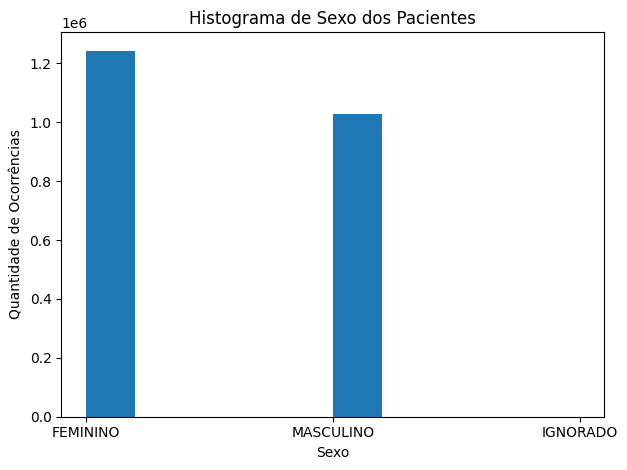

In [13]:
fig, ax = plt.subplots()

ax.hist('Sexo', data=dataCombinada)
ax.set_title("Histograma de Sexo dos Pacientes")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Sexo")

plt.tight_layout()

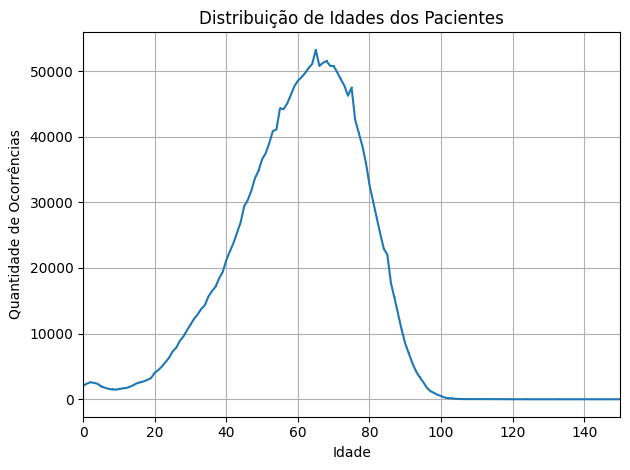

In [14]:
contagem_idades = dataCombinada['Idade'].value_counts().sort_index()

plt.plot(contagem_idades.index, contagem_idades.values, marker=',', linestyle='-')
plt.xlim(0, 150)

plt.title("Distribuição de Idades dos Pacientes")
plt.ylabel("Quantidade de Ocorrências")
plt.xlabel("Idade")

plt.grid(True)
plt.tight_layout()

plt.show()

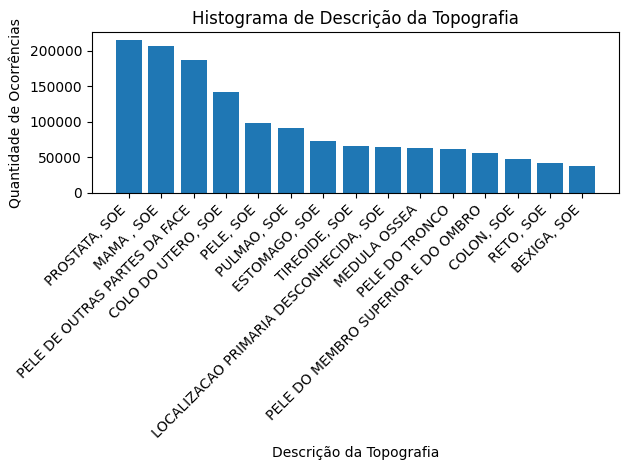

In [15]:
contagem_descricao_topografia = dataCombinada['Descrição da Topografia'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_topografia.head(15).index, contagem_descricao_topografia.head(15).values)
ax.set_title("Histograma de Descrição da Topografia")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Topografia")

ax.set_xticks(range(len(contagem_descricao_topografia.head(15).index)))
ax.set_xticklabels(contagem_descricao_topografia.head(15).index, rotation=45, ha='right')

plt.tight_layout()

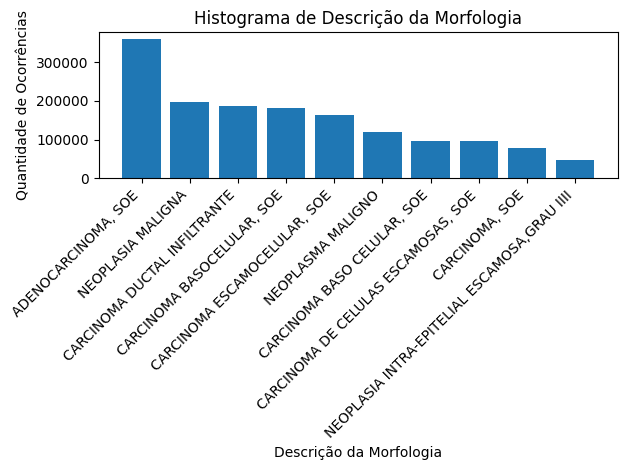

In [16]:
contagem_descricao_morfologia = dataCombinada['Descrição da Morfologia'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_morfologia.head(10).index, contagem_descricao_morfologia.head(10).values)
ax.set_title("Histograma de Descrição da Morfologia")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Morfologia")

ax.set_xticks(range(len(contagem_descricao_morfologia.head(10).index)))
ax.set_xticklabels(contagem_descricao_morfologia.head(10).index, rotation=45, ha='right')

plt.tight_layout()

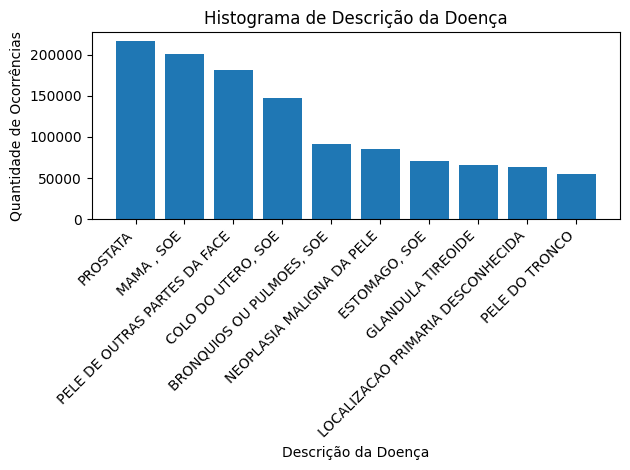

In [17]:
contagem_descricao_doenca = dataCombinada['Descrição da Doenca'].value_counts()

fig, ax = plt.subplots()

ax.bar(contagem_descricao_doenca.head(10).index, contagem_descricao_doenca.head(10).values)
ax.set_title("Histograma de Descrição da Doença")
ax.set_ylabel("Quantidade de Ocorrências")
ax.set_xlabel("Descrição da Doença")

ax.set_xticks(range(len(contagem_descricao_doenca.head(10).index)))
ax.set_xticklabels(contagem_descricao_doenca.head(10).index, rotation=45, ha='right')

plt.tight_layout()